# Redoubt volcano eruption, March 2009
Redoubt volcano in Alaska erupted (at least) 19 times from March-April, 2009. The first magmatic explosion was preceded by an earthquake swarm. Events got closer and closer together, merging into tremor. 

In [2]:
import os
import sys
from obspy.core import UTCDateTime
LIBpath = os.path.join( os.getenv('HOME'),'Documents','GitHub','kitchensinkGT', 'LIB')
sys.path.append(LIBpath)
import obspyGT.RSAM

searchRadiusDeg = 0.25
centerlatRD=60.485278
centerlonRD=-152.743056
starttRD = UTCDateTime("2009-03-14T00:00:00.000")
endtRD = UTCDateTime("2009-04-07T00:00:00.000")
SDS_TOP='SDS'

In [ ]:
# Need to devise mechanism to remove spikes (calibration pulses) from UAF/AVO data, prior to computing RSAM
# Remember Guy had a code for this
obspyGT.RSAM.fdsn_daily_wrapper(starttRD, endtRD, SDS_TOP, centerlatRD, centerlonRD, searchRadiusDeg, fdsnURL="IRIS", channel='EHZ')

In [ ]:
rsamRD = obspyGT.RSAM.RSAMobj()
rsamRD.read(starttRD, endtRD, SDS_TOP, metric='mean', speed=2)

In [ ]:
rsamRD.plot(percentile=99)

8 Trace(s) in Stream:
AV.REF..EHZ | 2009-03-14T01:26:01.000000Z - 2009-04-06T23:59:01.000000Z | 60.0 s, 34474 samples
AV.DFR..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.NCT..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.RDE..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.RDN..EHZ | 2009-03-14T01:26:00.000000Z - 2009-04-06T23:59:00.000000Z | 60.0 s, 34474 samples
AV.RDT..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.RED..EHZ | 2009-03-14T00:00:00.000000Z - 2009-04-06T23:59:00.000000Z | 60.0 s, 34560 samples
AV.RSO..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-24T23:58:00.000000Z | 60.0 s, 14399 samples


/Users/thompsong/Documents/GitHub/kitchensinkGT/LIB/obspyGT/RSAM.py:155: RuntimeWarning: All-NaN slice encountered
  y2 = np.nanmax(y,axis=1)


0

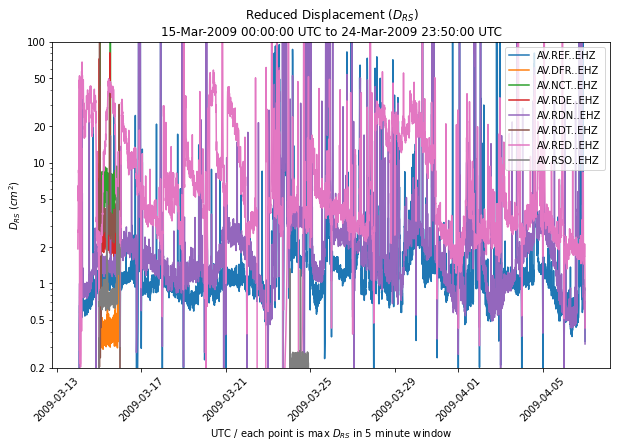

In [4]:
drsRD = obspyGT.RSAM.ReducedDisplacementObj()
drsRD.read(starttRD, endtRD, SDS_TOP, metric='median', speed=2)
drsRD.plot(type='log')

[4.810538783465691, 415.05622297966113, 85.0011608157418, 2255432.949981987, 210.28517980333865, 2284370.8620429784, 1224566.8539453743, 6.547223475042559]
[4.810538783465691, 415.05622297966113, 85.0011608157418, 2255432.949981987, 210.28517980333865, 2284370.8620429784, 1224566.8539453743, 6.547223475042559]


0

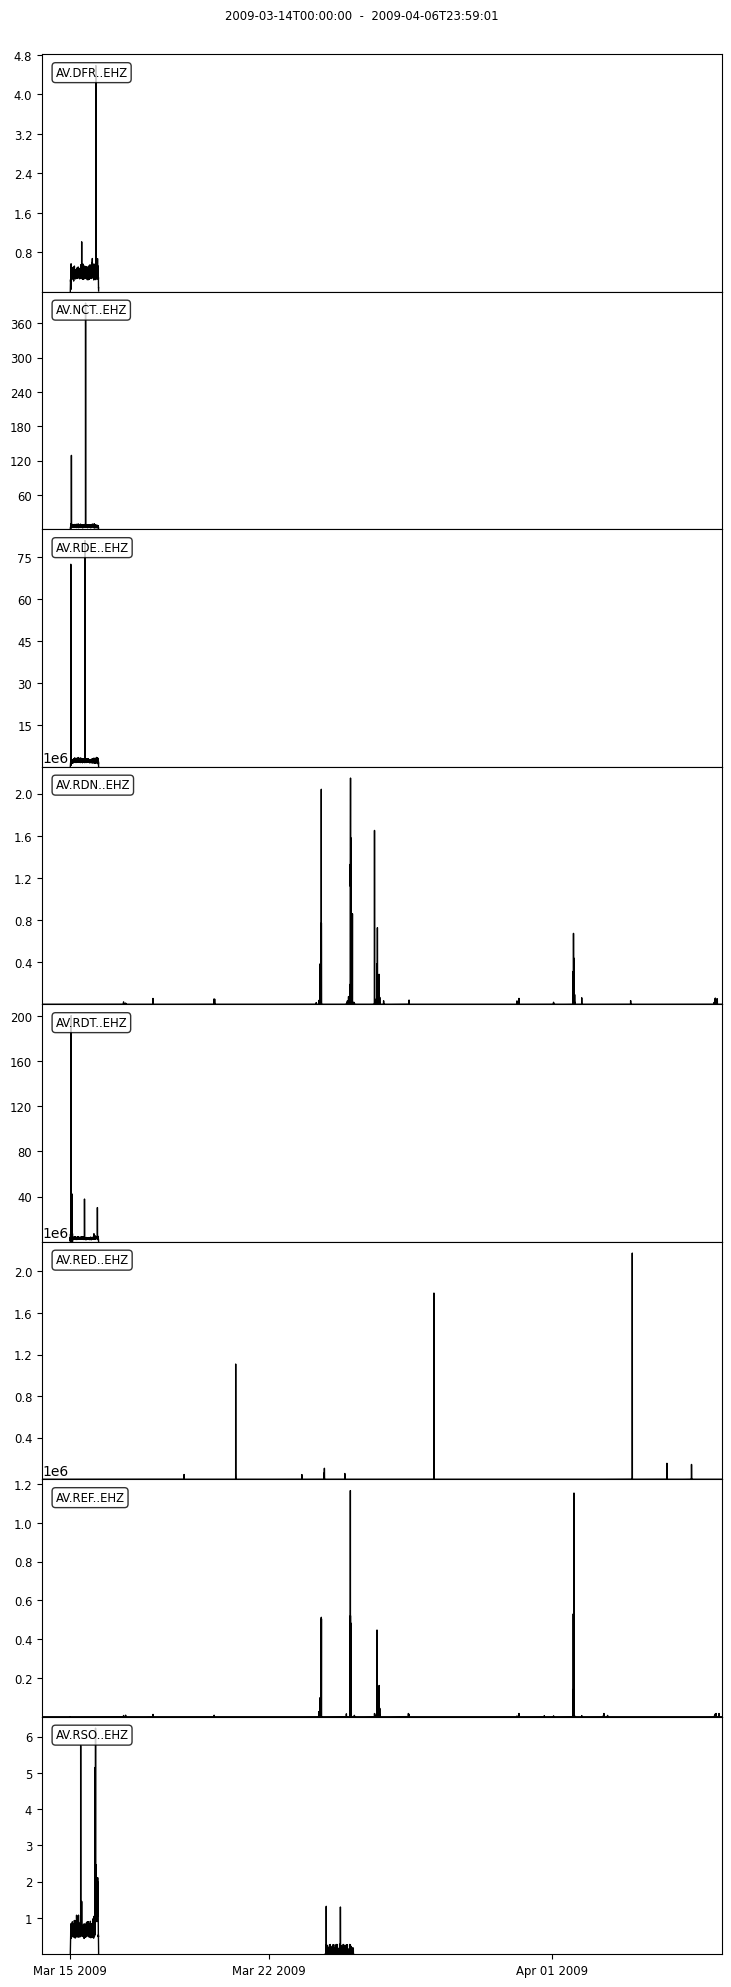

In [5]:
drsRD.plot(type='linear')

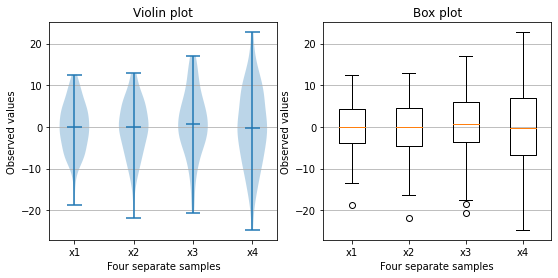

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

In [8]:
print(all_data)

[array([  6.29582586,   5.19659505,   3.3068076 ,  10.36846675,
        -3.8957287 ,  -2.87051746,   6.46731063,   5.812862  ,
        -4.85606876,  -7.42433462,  11.16069925,  -1.84991542,
         4.6978233 ,   0.12914068,   4.29398273,   8.40879904,
        -6.7650127 ,   9.93490932,   8.40576889,   1.21194042,
        -5.78918139,   6.26753107,  -2.58630412,  -2.98391698,
        -0.35470449,  -6.68762799,  -7.36198671,  -8.46052917,
         7.86516309,  -3.10465245,  -0.09994882,   2.81503351,
         4.66066857, -11.30818616,  -0.765524  ,  -3.11590462,
         4.41085932,   8.08110793,   3.30153032,  -1.37430695,
         3.96738976,  -3.2182108 ,  -2.89166626,   1.87634138,
       -18.73103117,  -8.15086207,  -0.85582924,  -1.30198155,
        -0.19720802,  10.9928681 ,   2.11415904,   1.4198708 ,
         8.87128839,   9.32583942,  -6.66365386,   4.94273138,
         3.99164813,   4.28859834,  -7.38472232,  12.57241276,
        -3.61931689,   9.68131836,  -1.5239043 ,  -9.0

In [7]:
print(drsRD.stream)

8 Trace(s) in Stream:
AV.REF..EHZ | 2009-03-14T01:26:01.000000Z - 2009-04-06T23:59:01.000000Z | 60.0 s, 34474 samples
AV.DFR..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.NCT..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.RDE..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.RDN..EHZ | 2009-03-14T01:26:00.000000Z - 2009-04-06T23:59:00.000000Z | 60.0 s, 34474 samples
AV.RDT..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-15T23:59:00.000000Z | 60.0 s, 1440 samples
AV.RED..EHZ | 2009-03-14T00:00:00.000000Z - 2009-04-06T23:59:00.000000Z | 60.0 s, 34560 samples
AV.RSO..EHZ | 2009-03-15T00:00:00.000000Z - 2009-03-24T23:58:00.000000Z | 60.0 s, 14399 samples


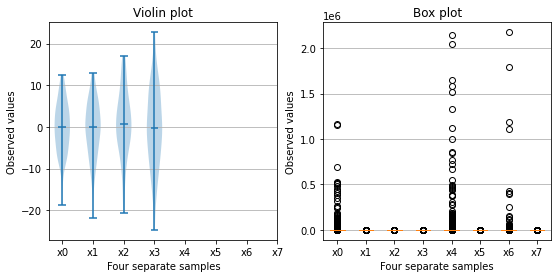

In [13]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

all_data2 = []
all_labels = []
for i, tr in enumerate(drsRD.stream):
    all_data2.append(tr.data)
    all_labels.append('x%d' % i)
    

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data2)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data2))],
                  labels=all_labels)
    ax.set_xlabel('Trace objects')
    ax.set_ylabel('Observed values')

plt.show()

In [17]:
print(len(all_data2))

8


In [18]:
print(all_data2)

[array([0.01076628, 0.03767937, 0.07149803, ..., 0.09190022, 0.04697309,
       0.0120386 ]), array([0.00626658, 0.02620919, 0.03622582, ..., 0.04083188, 0.03707019,
       0.01633825]), array([0.09788217, 0.48213926, 0.64077052, ..., 0.59067345, 0.37507067,
       0.24161545]), array([0.03415377, 0.12360249, 0.19167637, ..., 0.34824188, 0.19496665,
       0.07759114]), array([0.01376148, 0.04452975, 0.06571034, ..., 0.13951644, 0.14184277,
       0.16840706]), array([0.05048102, 4.083564  , 0.48634313, ..., 0.38292932, 0.29521778,
       0.13071672]), array([0.0971318 , 0.23027428, 0.47490267, ..., 0.18590373, 0.07728582,
       0.0242254 ]), array([8.56937700e-03, 3.02985764e-02, 7.04198311e-02, ...,
       1.95747489e-04, 1.18429568e-04, 9.46893530e-05])]
